In [47]:
#Imports necessarios para o funcionamento do modelo
import torch
import torch.nn as nn
import torch
from torchvision import transforms
from PIL import Image
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import transforms

In [48]:
#Utilizar GPU se tiver disponivel
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Mostrar se é CPU ou CUDA
device

device(type='cuda')

In [49]:
# 1) CONFIGURAÇÕES: caminhos
MODELO = 'C:\\Users\\alewa\\Desktop\\teste\\TrabalhoVisCompFinal\\Modelos\\epoca_183_best_model_acc_69.70_loss_1.0901.pth' #Modelo a ser carregado (ver problemma)
DIRETORIO_IMAGENS = 'images/Images' #Para extrair as classes
CAMINHO_IMAGEM = 'borzoi.jpg' #Image para fazer inferencia

In [50]:
base_dataset = ImageFolder(root=DIRETORIO_IMAGENS, transform=None)
#Verificar numero de classes no dataset
classes = len(base_dataset.classes)

#Printar numero de classes
print("Número de classes:", classes)
#printar nome das classes do base_dataset
print("Classes:", base_dataset.classes)

Número de classes: 120
Classes: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_

In [ ]:
# Transformações necessariar para o modelo classificar
validate_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

In [ ]:
#Modelo CNN para classificar a imagem
class ScratchCNN(nn.Module):
    def __init__(self, num_classes: int):
        super(ScratchCNN, self).__init__()
        self.features = nn.Sequential(
            # Bloco 1: 3 -> 64
            nn.Conv2d(3, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 224 -> 112

            # Bloco 2: 64 -> 128
            nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 112 -> 56

            # Bloco 3: 128 -> 256
            nn.Conv2d(128, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 56 -> 28

            # Bloco 4: 256 -> 512
            nn.Conv2d(256, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 28 -> 14

            # Bloco 5: 512 -> 512
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # 14 -> 7

            # Adaptive pooling: 7x7 -> 1x1
            nn.AdaptiveAvgPool2d((1, 1))
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),             # 512 x 1 x 1 -> 512
            nn.Dropout(p=0.5),
            nn.Linear(512, 256, bias=False),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.classifier(x)
        return x
    

In [55]:
# 5) CARREGA PESOS E PREPARA PARA INFERÊNCIA
model = ScratchCNN(num_classes=classes).to(device)
checkpoint = torch.load(MODELO, map_location=device)
model.load_state_dict(checkpoint)
model.eval()
print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


Classe prevista: n02090622-borzoi
Confiança: 0.99099%


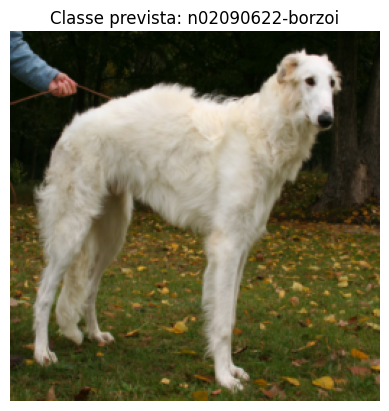

In [ ]:
# 6) CARREGA A IMAGEM, PREPROCESSA E INFERÊNCIA
img = Image.open(CAMINHO_IMAGEM).convert('RGB')
img = validate_transform(img).unsqueeze(0).to(device)
# Realiza a inferência
with torch.no_grad():
    output = model(img)
    _, predicted = torch.max(output, 1)
# Imprime a classe prevista
predicted_class = base_dataset.classes[predicted.item()]
print("Classe prevista:", predicted_class)
#Printar a confiança
confidence = torch.nn.functional.softmax(output, dim=1)[0][predicted.item()].item()
print(f"Confiança: {confidence:.5f}")
# 7) MOSTRA A IMAGEM E A CLASSE PREVISTA
plt.imshow(img.cpu().squeeze(0).permute(1, 2, 0) / 2 + 0.5)
plt.axis('off')
plt.title(f'Classe prevista: {predicted_class}')
plt.show()
